In [ ]:
INPUT = "model_data/example_study"
from echo_prime import EchoPrime

In [2]:
ep = EchoPrime()

100%|██████████| 1230676/1230676 [00:15<00:00, 78899.33it/s]


## Preprocess Data

In this case example study is a folder containing all echocardiograms in the dicom format from a single study. If you already preprocessed your data to mp4s take a look at ep.process_mp4s(INPUT)

100%|██████████| 50/50 [00:23<00:00,  2.17it/s]


Preprocessed and normalized video inputs


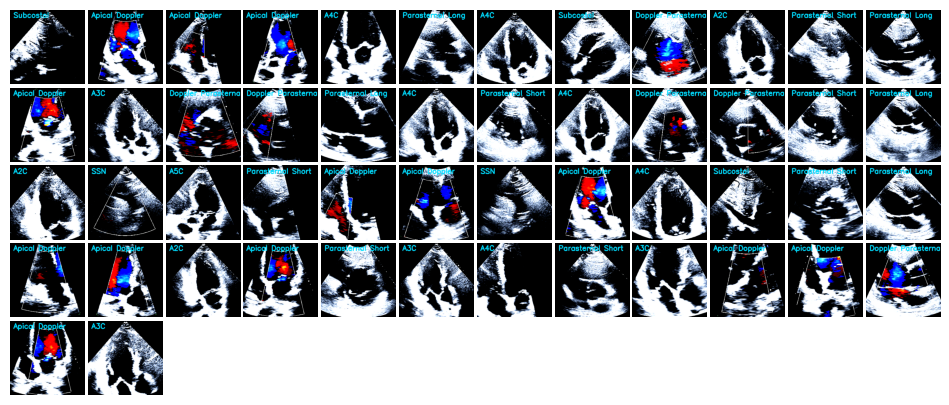

In [3]:
stack_of_videos = ep.process_dicoms(INPUT)
encoded_study=ep.encode_study(stack_of_videos, visualize=True)

# Obtain EchoPrime Interpretations

EchoPrime can predict all measurements present in a standard echocardiographic report. We are going to call predict_metrics to predict tasks reported in the paper. See ep.generate_report(encoded_study) if you are interested in generating a full text report.

In [4]:
#generate_report(encoded_study)

In [5]:
print("Feature logits")
ep.predict_metrics(encoded_study)

Feature logits


{'impella': 0.0,
 'ejection_fraction': 56.28,
 'pacemaker': 0.02,
 'rv_systolic_function_depressed': 0.0,
 'right_ventricle_dilation': 0.0,
 'left_atrium_dilation': 0.0,
 'right_atrium_dilation': 0.0,
 'mitraclip': 0.0,
 'mitral_annular_calcification': 0.0,
 'mitral_stenosis': 0.0,
 'mitral_regurgitation': 0.0,
 'tavr': 0.0,
 'bicuspid_aov_morphology': 0.0,
 'aortic_stenosis': 0.0,
 'aortic_regurgitation': 0.0,
 'tricuspid_stenosis': 0.0,
 'tricuspid_valve_regurgitation': 0.0,
 'pericardial_effusion': 0.0,
 'aortic_root_dilation': 0.0,
 'dilated_ivc': 0.02,
 'pulmonary_artery_pressure_continuous': 22.08823529411765}

It's good to pick ROC thresholds based on a val set from your institution. 

We provide ROC thresholds that maximize true positive rate and minize false positive rate on val studies from Cedars Sinai Medical Center in assets/roc_thresholds.csv file